In [1]:
# get data from yfinance
import yfinance as yf
import pandas as pd

ticker = "CANBK.NS"

data = yf.download(ticker, period = '5y' , interval = '1d', start = "2020-01-01")

data.to_csv("canbk_daily_data.csv")

/tmp/ipython-input-620798052.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period = '5y' , interval = '1d', start = "2020-01-01")
[*********************100%***********************]  1 of 1 completed


# Data Cleaning


In [2]:
df = pd.read_csv("canbk_daily_data.csv")

In [3]:
df

,Price,Close,High,Low,Open,Volume
0,Ticker,CANBK.NS,CANBK.NS,CANBK.NS,CANBK.NS,CANBK.NS
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,38.75715255737305,39.05440699888638,38.43366389724218,38.83583520238003,21079405
3,2020-01-02,40.01612854003906,40.18224191982444,38.6347530597542,38.88829716716971,35167265
4,2020-01-03,38.75715255737305,39.95492506838836,38.58229445313978,39.83252539596736,33234705
...,...,...,...,...,...,...
1235,2024-12-24,97.07196807861328,97.94083109342102,96.35755945175879,97.4967434247102,15379038
1236,2024-12-26,97.53536224365234,99.08001662995598,97.02369616870425,97.31332208853941,14937263
1237,2024-12-27,96.88853454589844,98.34630550296094,96.73406543221296,97.53535738709769,7369762
1238,2024-12-30,96.00035858154297,97.88290485736864,95.28594998387705,96.88853388267648,42398975


In [4]:
df_clean = df.drop([0,1])

In [5]:
df_clean.rename(columns = {'Price' : "Date"}, inplace = True)

In [6]:
df_clean

,Date,Close,High,Low,Open,Volume
2,2020-01-01,38.75715255737305,39.05440699888638,38.43366389724218,38.83583520238003,21079405
3,2020-01-02,40.01612854003906,40.18224191982444,38.6347530597542,38.88829716716971,35167265
4,2020-01-03,38.75715255737305,39.95492506838836,38.58229445313978,39.83252539596736,33234705
5,2020-01-06,36.27417755126953,38.59978137985299,35.95068888457855,38.56480909126894,68253435
6,2020-01-07,36.379093170166016,37.47195223759402,35.793318975751184,37.31458026507309,71112745
...,...,...,...,...,...,...
1235,2024-12-24,97.07196807861328,97.94083109342102,96.35755945175879,97.4967434247102,15379038
1236,2024-12-26,97.53536224365234,99.08001662995598,97.02369616870425,97.31332208853941,14937263
1237,2024-12-27,96.88853454589844,98.34630550296094,96.73406543221296,97.53535738709769,7369762
1238,2024-12-30,96.00035858154297,97.88290485736864,95.28594998387705,96.88853388267648,42398975


In [7]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

In [8]:
df_clean

,Date,Close,High,Low,Open,Volume
2,2020-01-01,38.75715255737305,39.05440699888638,38.43366389724218,38.83583520238003,21079405
3,2020-01-02,40.01612854003906,40.18224191982444,38.6347530597542,38.88829716716971,35167265
4,2020-01-03,38.75715255737305,39.95492506838836,38.58229445313978,39.83252539596736,33234705
5,2020-01-06,36.27417755126953,38.59978137985299,35.95068888457855,38.56480909126894,68253435
6,2020-01-07,36.379093170166016,37.47195223759402,35.793318975751184,37.31458026507309,71112745
...,...,...,...,...,...,...
1235,2024-12-24,97.07196807861328,97.94083109342102,96.35755945175879,97.4967434247102,15379038
1236,2024-12-26,97.53536224365234,99.08001662995598,97.02369616870425,97.31332208853941,14937263
1237,2024-12-27,96.88853454589844,98.34630550296094,96.73406543221296,97.53535738709769,7369762
1238,2024-12-30,96.00035858154297,97.88290485736864,95.28594998387705,96.88853388267648,42398975


In [9]:
for col in df_clean.columns[1:]:
  df_clean[col] = pd.to_numeric(df_clean[col]).round(2)

In [10]:
df_clean

,Date,Close,High,Low,Open,Volume
2,2020-01-01,38.76,39.05,38.43,38.84,21079405
3,2020-01-02,40.02,40.18,38.63,38.89,35167265
4,2020-01-03,38.76,39.95,38.58,39.83,33234705
5,2020-01-06,36.27,38.60,35.95,38.56,68253435
6,2020-01-07,36.38,37.47,35.79,37.31,71112745
...,...,...,...,...,...,...
1235,2024-12-24,97.07,97.94,96.36,97.50,15379038
1236,2024-12-26,97.54,99.08,97.02,97.31,14937263
1237,2024-12-27,96.89,98.35,96.73,97.54,7369762
1238,2024-12-30,96.00,97.88,95.29,96.89,42398975


In [11]:
df_clean.set_index('Date',inplace = True)

In [12]:
df_clean.to_csv('canbk_daily_data_cleaned.csv')

In [13]:
df_clean = pd.read_csv('canbk_daily_data_cleaned.csv')

In [14]:
df_clean

,Date,Close,High,Low,Open,Volume
0,2020-01-01,38.76,39.05,38.43,38.84,21079405
1,2020-01-02,40.02,40.18,38.63,38.89,35167265
2,2020-01-03,38.76,39.95,38.58,39.83,33234705
3,2020-01-06,36.27,38.60,35.95,38.56,68253435
4,2020-01-07,36.38,37.47,35.79,37.31,71112745
...,...,...,...,...,...,...
1233,2024-12-24,97.07,97.94,96.36,97.50,15379038
1234,2024-12-26,97.54,99.08,97.02,97.31,14937263
1235,2024-12-27,96.89,98.35,96.73,97.54,7369762
1236,2024-12-30,96.00,97.88,95.29,96.89,42398975


In [15]:
df_clean = df_clean[(df_clean != 0).all(axis = 1)]

In [16]:
df_clean

,Date,Close,High,Low,Open,Volume
0,2020-01-01,38.76,39.05,38.43,38.84,21079405
1,2020-01-02,40.02,40.18,38.63,38.89,35167265
2,2020-01-03,38.76,39.95,38.58,39.83,33234705
3,2020-01-06,36.27,38.60,35.95,38.56,68253435
4,2020-01-07,36.38,37.47,35.79,37.31,71112745
...,...,...,...,...,...,...
1233,2024-12-24,97.07,97.94,96.36,97.50,15379038
1234,2024-12-26,97.54,99.08,97.02,97.31,14937263
1235,2024-12-27,96.89,98.35,96.73,97.54,7369762
1236,2024-12-30,96.00,97.88,95.29,96.89,42398975


# Feature Engineering


In [17]:
import numpy as np

In [18]:
df_clean = df_clean.copy()

## Macro Features

In [19]:
#50 days simple moving average
df_clean['SMA_50'] = df_clean['Close'].rolling(window = 50).mean()

#200 days simple moving average
df_clean['SMA_200'] = df_clean['Close'].rolling(window = 200).mean()

In [20]:
df_clean

,Date,Close,High,Low,Open,Volume,SMA_50,SMA_200
0,2020-01-01,38.76,39.05,38.43,38.84,21079405,NaN,NaN
1,2020-01-02,40.02,40.18,38.63,38.89,35167265,NaN,NaN
2,2020-01-03,38.76,39.95,38.58,39.83,33234705,NaN,NaN
3,2020-01-06,36.27,38.60,35.95,38.56,68253435,NaN,NaN
4,2020-01-07,36.38,37.47,35.79,37.31,71112745,NaN,NaN
...,...,...,...,...,...,...,...,...
1233,2024-12-24,97.07,97.94,96.36,97.50,15379038,99.1746,106.36015
1234,2024-12-26,97.54,99.08,97.02,97.31,14937263,99.1078,106.30395
1235,2024-12-27,96.89,98.35,96.73,97.54,7369762,99.0292,106.23205
1236,2024-12-30,96.00,97.88,95.29,96.89,42398975,98.9340,106.14580


###Moving Average Convergence Divergence

In [21]:
#12 Days Exponential weighted moving avergae
ema12 = df_clean['Close'].ewm(span = 12, adjust = False).mean()

#26 Days Exponential weighted moving average
ema26 = df_clean['Close'].ewm(span = 26, adjust = False).mean()

In [22]:
# MACD Line
df_clean['MACD'] = ema12-ema26

In [23]:
df_clean

,Date,Close,High,Low,Open,Volume,SMA_50,SMA_200,MACD
0,2020-01-01,38.76,39.05,38.43,38.84,21079405,NaN,NaN,0.000000
1,2020-01-02,40.02,40.18,38.63,38.89,35167265,NaN,NaN,0.100513
2,2020-01-03,38.76,39.95,38.58,39.83,33234705,NaN,NaN,0.077604
3,2020-01-06,36.27,38.60,35.95,38.56,68253435,NaN,NaN,-0.139862
4,2020-01-07,36.38,37.47,35.79,37.31,71112745,NaN,NaN,-0.299872
...,...,...,...,...,...,...,...,...,...
1233,2024-12-24,97.07,97.94,96.36,97.50,15379038,99.1746,106.36015,-0.313355
1234,2024-12-26,97.54,99.08,97.02,97.31,14937263,99.1078,106.30395,-0.477674
1235,2024-12-27,96.89,98.35,96.73,97.54,7369762,99.0292,106.23205,-0.652822
1236,2024-12-30,96.00,97.88,95.29,96.89,42398975,98.9340,106.14580,-0.853604


In [24]:
#MACD Signal Line
df_clean['MACD_Signal'] = df_clean['MACD'].ewm(span = 9, adjust = False).mean()

## Micro Features


In [25]:
df_clean

,Date,Close,High,Low,Open,Volume,SMA_50,SMA_200,MACD,MACD_Signal
0,2020-01-01,38.76,39.05,38.43,38.84,21079405,NaN,NaN,0.000000,0.000000
1,2020-01-02,40.02,40.18,38.63,38.89,35167265,NaN,NaN,0.100513,0.020103
2,2020-01-03,38.76,39.95,38.58,39.83,33234705,NaN,NaN,0.077604,0.031603
3,2020-01-06,36.27,38.60,35.95,38.56,68253435,NaN,NaN,-0.139862,-0.002690
4,2020-01-07,36.38,37.47,35.79,37.31,71112745,NaN,NaN,-0.299872,-0.062126
...,...,...,...,...,...,...,...,...,...,...
1233,2024-12-24,97.07,97.94,96.36,97.50,15379038,99.1746,106.36015,-0.313355,0.544106
1234,2024-12-26,97.54,99.08,97.02,97.31,14937263,99.1078,106.30395,-0.477674,0.339750
1235,2024-12-27,96.89,98.35,96.73,97.54,7369762,99.0292,106.23205,-0.652822,0.141235
1236,2024-12-30,96.00,97.88,95.29,96.89,42398975,98.9340,106.14580,-0.853604,-0.057732


In [26]:
#Relative Strength Index - 14 days
delta = df_clean['Close'].diff()

gain = (delta.where(delta > 0 , 0))
loss = (-delta.where(delta < 0 , 0))

#smooth averages
avg_gain = gain.ewm(alpha = 1/14, adjust=False).mean()
avg_loss = loss.ewm(alpha = 1/14,adjust = False).mean()

#RS
rs = avg_gain/avg_loss
df_clean['RSI_14'] = 100 - (100/(1 + rs))

In [27]:
#Bollinger Bands (20 day, 2 std-dev)
df_clean['BB_Middle'] = df_clean['Close'].rolling(window = 20).mean()
std_dev = df_clean['Close'].rolling(window = 20).std()

df_clean['BB_Upper'] = df_clean['BB_Middle'] + (2*std_dev)
df_clean['BB_Lower'] = df_clean['BB_Middle'] - (2*std_dev)

In [28]:
#Average True Range

prev_close = df_clean['Close'].shift(1)

tr1 = df_clean['High'] - df_clean['Low']
tr2 = np.abs(df_clean['High'] - prev_close)
tr3 = np.abs(df_clean['Low'] - prev_close)

tr = pd.concat([tr1,tr2,tr3], axis =1).max(axis =1)

df_clean['ATR_14'] = tr.ewm(alpha = 1/14, adjust = False).mean()

# Input Output


In [29]:
df_clean['Target_Next_Close'] = df_clean['Close'].shift(-1)
df_model = df_clean.dropna()

In [30]:
df_model

,Date,Close,High,Low,Open,Volume,SMA_50,SMA_200,MACD,MACD_Signal,RSI_14,BB_Middle,BB_Upper,BB_Lower,ATR_14,Target_Next_Close
199,2020-10-19,15.63,15.84,15.44,15.45,27593950,17.0734,20.63435,-0.434415,-0.490703,42.897768,15.6375,16.463546,14.811454,0.597646,15.52
200,2020-10-20,15.52,15.61,15.40,15.40,14297385,17.0276,20.51815,-0.414069,-0.475376,41.605028,15.5770,16.223972,14.930028,0.571385,15.53
201,2020-10-21,15.53,15.84,15.33,15.68,21420035,16.9838,20.39570,-0.392611,-0.458823,41.776805,15.5710,16.217347,14.924653,0.567001,15.44
202,2020-10-22,15.44,15.54,15.39,15.49,12004835,16.9350,20.27910,-0.378505,-0.442760,40.618715,15.5725,16.217411,14.927589,0.537215,15.66
203,2020-10-23,15.66,15.72,15.43,15.49,15813620,16.8910,20.17605,-0.345590,-0.423326,44.657327,15.6270,16.066813,15.187187,0.519557,15.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,2024-12-23,97.58,98.46,95.67,97.60,20493999,99.2424,106.40535,-0.051212,0.758471,42.434547,101.4635,107.827131,95.099869,2.727119,97.07
1233,2024-12-24,97.07,97.94,96.36,97.50,15379038,99.1746,106.36015,-0.313355,0.544106,41.320566,101.4035,107.914825,94.892175,2.645182,97.54
1234,2024-12-26,97.54,99.08,97.02,97.31,14937263,99.1078,106.30395,-0.477674,0.339750,42.810566,101.3780,107.948350,94.807650,2.603384,96.89
1235,2024-12-27,96.89,98.35,96.73,97.54,7369762,99.0292,106.23205,-0.652822,0.141235,41.250546,101.2555,108.072564,94.438436,2.533142,96.00


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [32]:
feature_cols = [
    'Open', 'High', 'Low', 'Close', 'Volume',  # Raw
    'SMA_50', 'SMA_200',                       # Macro
    'MACD', 'MACD_Signal',                     # Momentum
    'RSI_14',                                  # Momentum
    'ATR_14',                                  # Volatility
    'BB_Upper', 'BB_Lower'                     # Volatility
]

X = df_model[feature_cols]
Y = df_model['Target_Next_Close']

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , shuffle = False)

In [34]:
scaler = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1,1))

X_test_scaled = scaler.transform(X_test)
Y_test_scaled = scaler_Y.transform(Y_test.values.reshape(-1,1))

# Model Data


In [35]:
import torch
from torch.utils.data import Dataset,DataLoader

In [36]:
X_train_scaled

array([[-1.54064127, -1.54207639, -1.52052697, ..., -1.83912858,
        -1.59635454, -1.49116391],
       [-1.54324267, -1.55391528, -1.5226315 , ..., -1.89469037,
        -1.6086192 , -1.4842634 ],
       [-1.5286748 , -1.54207639, -1.52631442, ..., -1.90396745,
        -1.60895836, -1.4845762 ],
       ...,
       [ 3.24490598,  3.18575634,  3.27674393, ...,  4.27971101,
         3.51597883,  2.40602115],
       [ 3.22565557,  3.28149688,  3.24570214, ...,  4.28430245,
         3.52396838,  2.51885851],
       [ 3.25947386,  3.30002731,  3.23991469, ...,  4.35959638,
         3.53190044,  2.64974365]])

In [37]:
class DualScaleDataset(Dataset):
  def __init__(self,X_macro , X_micro , Y , lookback_macro = 90 , lookback_micro = 5):
    self.X_macro = torch.tensor(X_macro , dtype = torch.float32)
    self.X_micro = torch.tensor(X_micro , dtype = torch.float32)
    self.Y = torch.tensor(Y,dtype = torch.float32)

    self.lookback_macro = lookback_macro
    self.lookback_micro = lookback_micro

  def __len__(self):
    return len(self.X_macro) - self.lookback_macro

  def __getitem__(self,idx):
    t = idx + self.lookback_macro

    x_trend = self.X_macro[t - self.lookback_macro : t]
    x_vol = self.X_micro[t - self.lookback_micro : t]
    Y_target = self.Y[t]

    return x_trend,x_vol,Y_target

In [38]:
macro_cols = ['SMA_50', 'SMA_200', 'MACD', 'MACD_Signal']
micro_cols = ['RSI_14', 'ATR_14', 'BB_Upper', 'BB_Lower']

In [39]:
# Get the indices of the macro and micro features from the feature_cols list
macro_indices = [feature_cols.index(col) for col in macro_cols]
micro_indices = [feature_cols.index(col) for col in micro_cols]

X_train_macro = X_train_scaled[:, macro_indices]
X_train_micro = X_train_scaled[:, micro_indices]
Y_train_vals = Y_train_scaled

X_test_macro = X_test_scaled[:, macro_indices]
X_test_micro = X_test_scaled[:, micro_indices]
Y_test_vals = Y_test_scaled

In [40]:
train_dataset = DualScaleDataset(X_train_macro,X_train_micro,Y_train_vals)
test_dataset = DualScaleDataset(X_test_macro,X_test_micro,Y_test_vals)

In [41]:
train_loader = DataLoader(train_dataset,batch_size = 32,shuffle = True)
test_loader = DataLoader(test_dataset,batch_size =32,shuffle =False)

#Model


In [42]:
import torch.nn as nn

In [43]:
class DualLSTM(nn.Module):
  def __init__(self,input_dim_trend, input_dim_mom ,hidden_trend = 64, hidden_mom = 32):
    super().__init__()

    #branch1
    self.lstm_trend = nn.LSTM(input_dim_trend , hidden_trend , batch_first = True)
    self.dropout_trend = nn.Dropout(0.2)

    #branch2
    self.lstm_mom = nn.LSTM(input_dim_mom , hidden_mom , batch_first = True)
    self.dropout_mom = nn.Dropout(0.2)

    #concatenate
    fusion_dim = hidden_trend + hidden_mom

    #ANN
    self.head = nn.Sequential(
        nn.Linear(fusion_dim,128),
        nn.ReLU(),
        nn.Dropout(0.4),

        nn.Linear(128,64),
        nn.ReLU(),
        nn.Dropout(0.4),

        nn.Linear(64,1)
    )

  def forward(self,x_trend,x_mom):

    #branch 1
    _, (h_trend , _) = self.lstm_trend(x_trend)

    trend_out = h_trend[-1]
    trend_out = self.dropout_trend(trend_out)

    #branch 2
    _, (h_mom , _) = self.lstm_mom(x_mom)

    mom_out = h_mom[-1]
    mom_out = self.dropout_mom(mom_out)

    #fusion
    combined = torch.cat([trend_out, mom_out] , dim = 1)

    predcition = self.head(combined)

    return predcition

In [44]:
input_dim_trend = len(macro_cols)
input_dim_mom = len(micro_cols)

In [45]:
model = DualLSTM(input_dim_trend, input_dim_mom)

In [46]:
print(model)

DualLSTM(
  (lstm_trend): LSTM(4, 64, batch_first=True)
  (dropout_trend): Dropout(p=0.2, inplace=False)
  (lstm_mom): LSTM(4, 32, batch_first=True)
  (dropout_mom): Dropout(p=0.2, inplace=False)
  (head): Sequential(
    (0): Linear(in_features=96, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)


In [47]:
!pip install torchinfo

In [48]:
import torchinfo
torchinfo.summary(model)

Layer (type:depth-idx)                   Param #
DualLSTM                                 --
├─LSTM: 1-1                              17,920
├─Dropout: 1-2                           --
├─LSTM: 1-3                              4,864
├─Dropout: 1-4                           --
├─Sequential: 1-5                        --
│    └─Linear: 2-1                       12,416
│    └─ReLU: 2-2                         --
│    └─Dropout: 2-3                      --
│    └─Linear: 2-4                       8,256
│    └─ReLU: 2-5                         --
│    └─Dropout: 2-6                      --
│    └─Linear: 2-7                       65
Total params: 43,521
Trainable params: 43,521
Non-trainable params: 0

# Training


In [49]:
import torch.optim as optim

In [50]:
criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(),lr = 0.0005, weight_decay = 1e-3)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode = 'min', factor = 0.5, patience= 10)

early_stopping_patience = 20
best_val_loss = float('inf')
epochs_no_improvements = 0
epochs = 100

In [51]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
model.to(device)

DualLSTM(
  (lstm_trend): LSTM(4, 64, batch_first=True)
  (dropout_trend): Dropout(p=0.2, inplace=False)
  (lstm_mom): LSTM(4, 32, batch_first=True)
  (dropout_mom): Dropout(p=0.2, inplace=False)
  (head): Sequential(
    (0): Linear(in_features=96, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [52]:
train_loss = []
val_loss_per_epoch = []

for epoch in range(epochs):
    model.train()
    running_train_epoch_loss = 0.0

    for x_trend, x_mom, y_target in train_loader:
        x_trend = x_trend.to(device)
        x_mom = x_mom.to(device)
        y_target = y_target.to(device) # Shape is likely [32, 1] already due to DataLoader

        optimizer.zero_grad()

        # Forward pass
        predictions = model(x_trend, x_mom)

        # Ensure dimensions match exactly [32, 1] vs [32, 1]
        loss = criterion(predictions, y_target)

        loss.backward()
        optimizer.step()

        running_train_epoch_loss += loss.item()

    avg_train_loss = running_train_epoch_loss / len(train_loader)
    train_loss.append(avg_train_loss)

    # Validation
    model.eval()
    running_val_epoch_loss = 0.0

    with torch.no_grad():
        for x_trend, x_mom, y_target in test_loader:
            x_trend = x_trend.to(device)
            x_mom = x_mom.to(device)
            y_target = y_target.to(device)

            val_predictions = model(x_trend, x_mom)
            current_val_loss = criterion(val_predictions, y_target)

            running_val_epoch_loss += current_val_loss.item()

    avg_val_loss = running_val_epoch_loss / len(test_loader)
    val_loss_per_epoch.append(avg_val_loss)

    # Calculate RMSE on the SCALED data (for monitoring)
    val_rmse = np.sqrt(avg_val_loss)

    scheduler.step(avg_val_loss)

    print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val RMSE: {val_rmse:.4f}")

    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improvements = 0
        torch.save(model.state_dict(), "best_model.pth")
    else:
        epochs_no_improvements += 1
        if epochs_no_improvements >= early_stopping_patience:
            print("Early stopping triggered")
            break

Epoch [1/100] | Train Loss: 0.7780 | Val Loss: 6.4523 | Val RMSE: 2.5401
Epoch [2/100] | Train Loss: 0.3903 | Val Loss: 1.4836 | Val RMSE: 1.2180
Epoch [3/100] | Train Loss: 0.1121 | Val Loss: 0.9037 | Val RMSE: 0.9506
Epoch [4/100] | Train Loss: 0.0825 | Val Loss: 0.7915 | Val RMSE: 0.8897
Epoch [5/100] | Train Loss: 0.0716 | Val Loss: 0.8228 | Val RMSE: 0.9071
Epoch [6/100] | Train Loss: 0.0574 | Val Loss: 0.5025 | Val RMSE: 0.7089
Epoch [7/100] | Train Loss: 0.0570 | Val Loss: 0.6585 | Val RMSE: 0.8115
Epoch [8/100] | Train Loss: 0.0712 | Val Loss: 0.2795 | Val RMSE: 0.5287
Epoch [9/100] | Train Loss: 0.0611 | Val Loss: 0.2437 | Val RMSE: 0.4936
Epoch [10/100] | Train Loss: 0.0513 | Val Loss: 0.3625 | Val RMSE: 0.6021
Epoch [11/100] | Train Loss: 0.0521 | Val Loss: 0.2986 | Val RMSE: 0.5465
Epoch [12/100] | Train Loss: 0.0494 | Val Loss: 0.2599 | Val RMSE: 0.5098
Epoch [13/100] | Train Loss: 0.0519 | Val Loss: 0.4879 | Val RMSE: 0.6985
Epoch [14/100] | Train Loss: 0.0566 | Val Loss:

# Testing


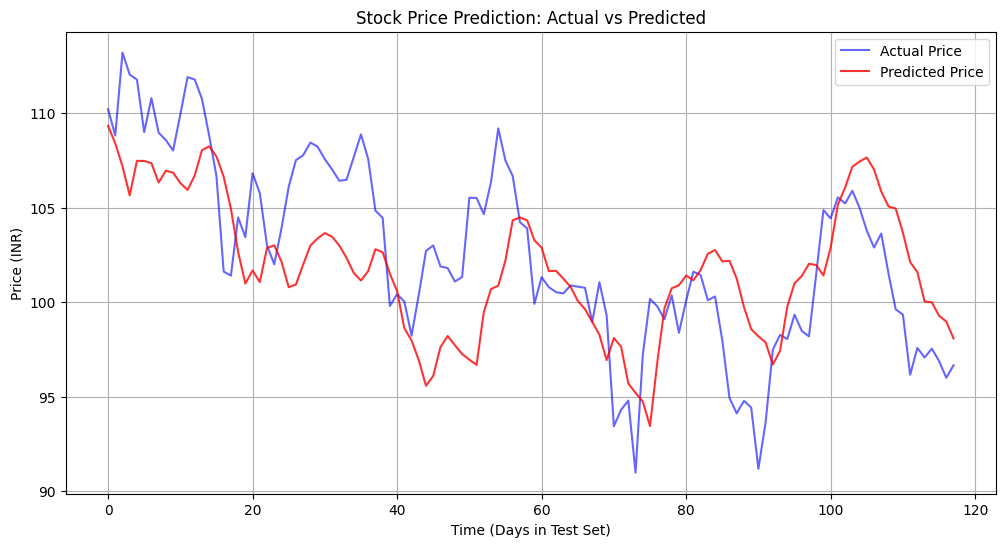

In [54]:
import matplotlib.pyplot as plt

model.eval()
predictions = []
actuals = []

with torch.no_grad():
  for x_trend,x_mom, y_target in test_loader:
    x_trend = x_trend.to(device)
    x_mom = x_mom.to(device)

    out = model(x_trend,x_mom)

    predictions.extend(out.cpu().numpy())
    actuals.extend(y_target.cpu().numpy())

predictions  = np.array(predictions).flatten()
actuals = np.array(actuals).flatten()

pred_prices = scaler_Y.inverse_transform(predictions.reshape(-1,1))
actual_prices = scaler_Y.inverse_transform(actuals.reshape(-1,1))

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Price', color='blue', alpha=0.6)
plt.plot(pred_prices, label='Predicted Price', color='red', alpha=0.8)
plt.title('Stock Price Prediction: Actual vs Predicted')
plt.xlabel('Time (Days in Test Set)')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()